# Before we start,

Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. In case of any problems, navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

In [ ]:
!nvidia-smi

Sat Dec 28 02:31:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8


In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


# Inference with Pre-trained COCO Model.

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 39.5MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return t

/content


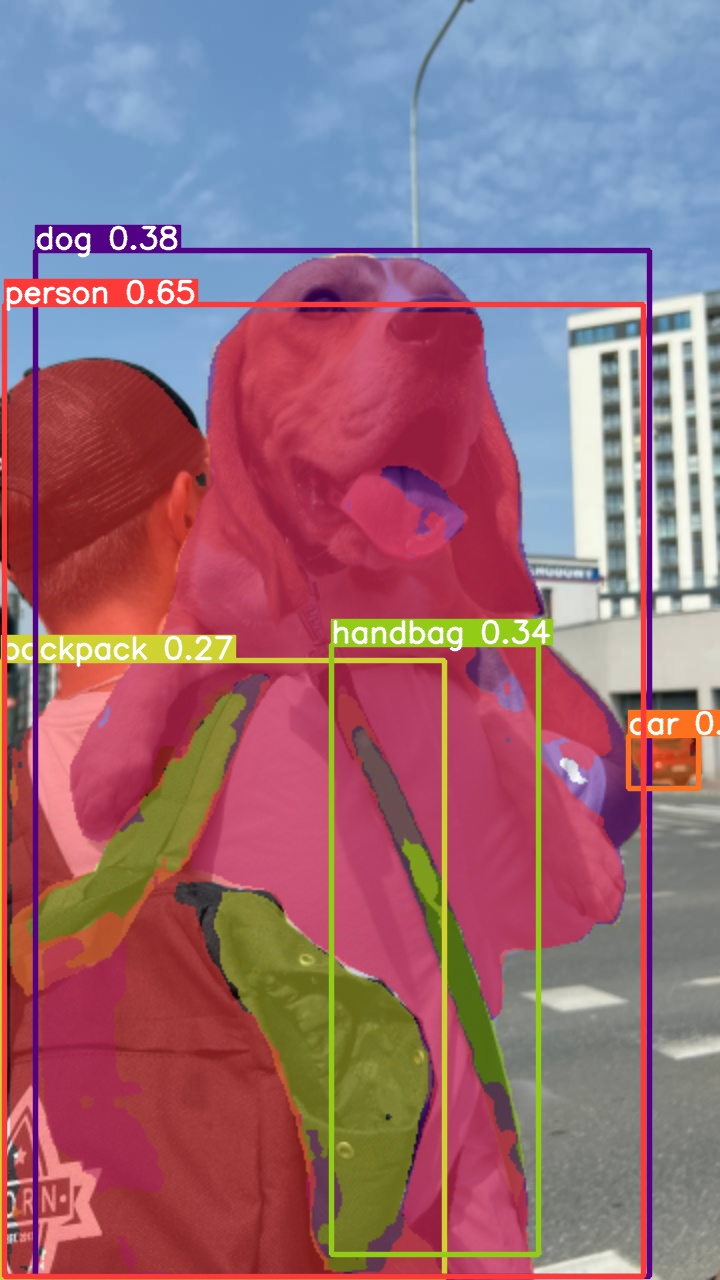

In [6]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height = 600)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
ROOT_PATH = "/content/drive/MyDrive/Yolov8-seg"

In [9]:
!pwd


/content


In [10]:
#Change to /content/drive/MyDrive/Yolov8-seg directory
%cd "/content/drive/MyDrive/Yolov8-seg"

/content/drive/MyDrive/Yolov8-seg


In [11]:
!pwd


/content/drive/MyDrive/Yolov8-seg


In [12]:
!ls


data.yaml  nuclei_data	yolov8_instance_segmentation.ipynb


# Custom Training

In [13]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 69.3MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

In [14]:
!ls runs/segment/train/

args.yaml					     MaskF1_curve.png  train_batch1.jpg
BoxF1_curve.png					     MaskP_curve.png   train_batch2.jpg
BoxP_curve.png					     MaskPR_curve.png  val_batch0_labels.jpg
BoxPR_curve.png					     MaskR_curve.png   val_batch0_pred.jpg
BoxR_curve.png					     results.csv       weights
confusion_matrix.png				     results.png
events.out.tfevents.1735423510.24197bb0c70a.14420.0  train_batch0.jpg


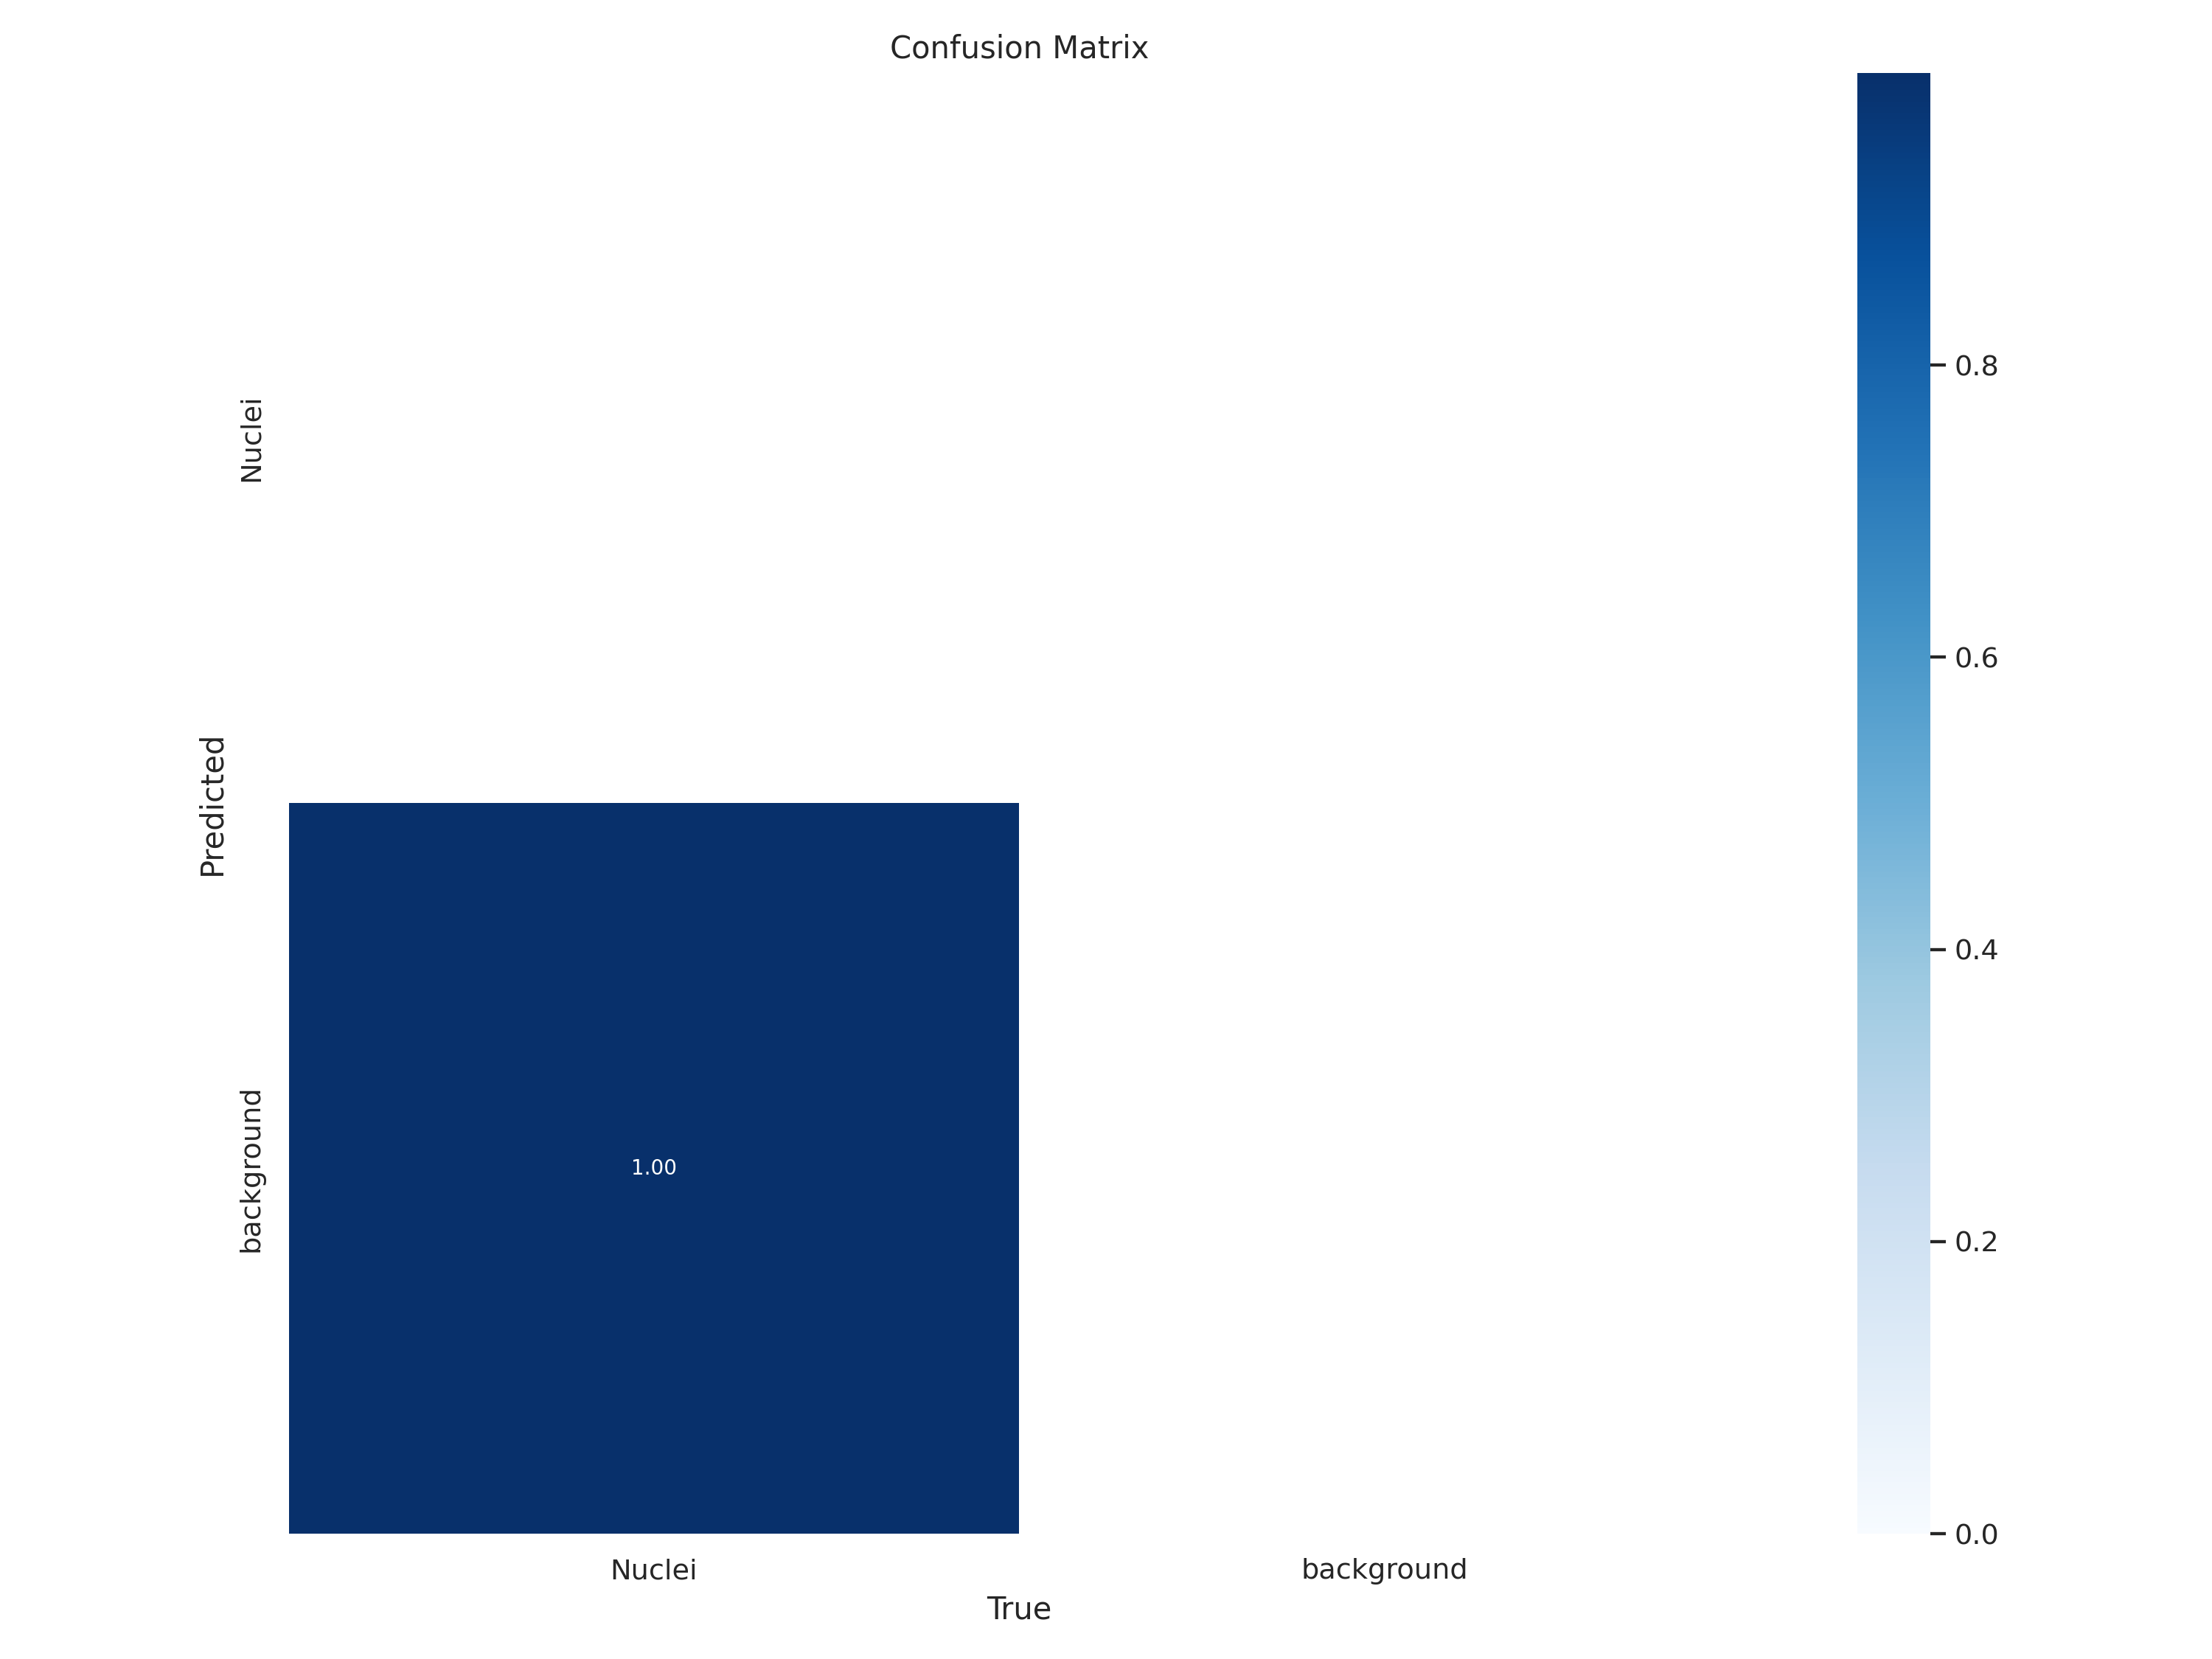

In [16]:
Image(filename=f'/content/drive/MyDrive/Yolov8-seg/runs/segment/train/confusion_matrix.png', width=600)

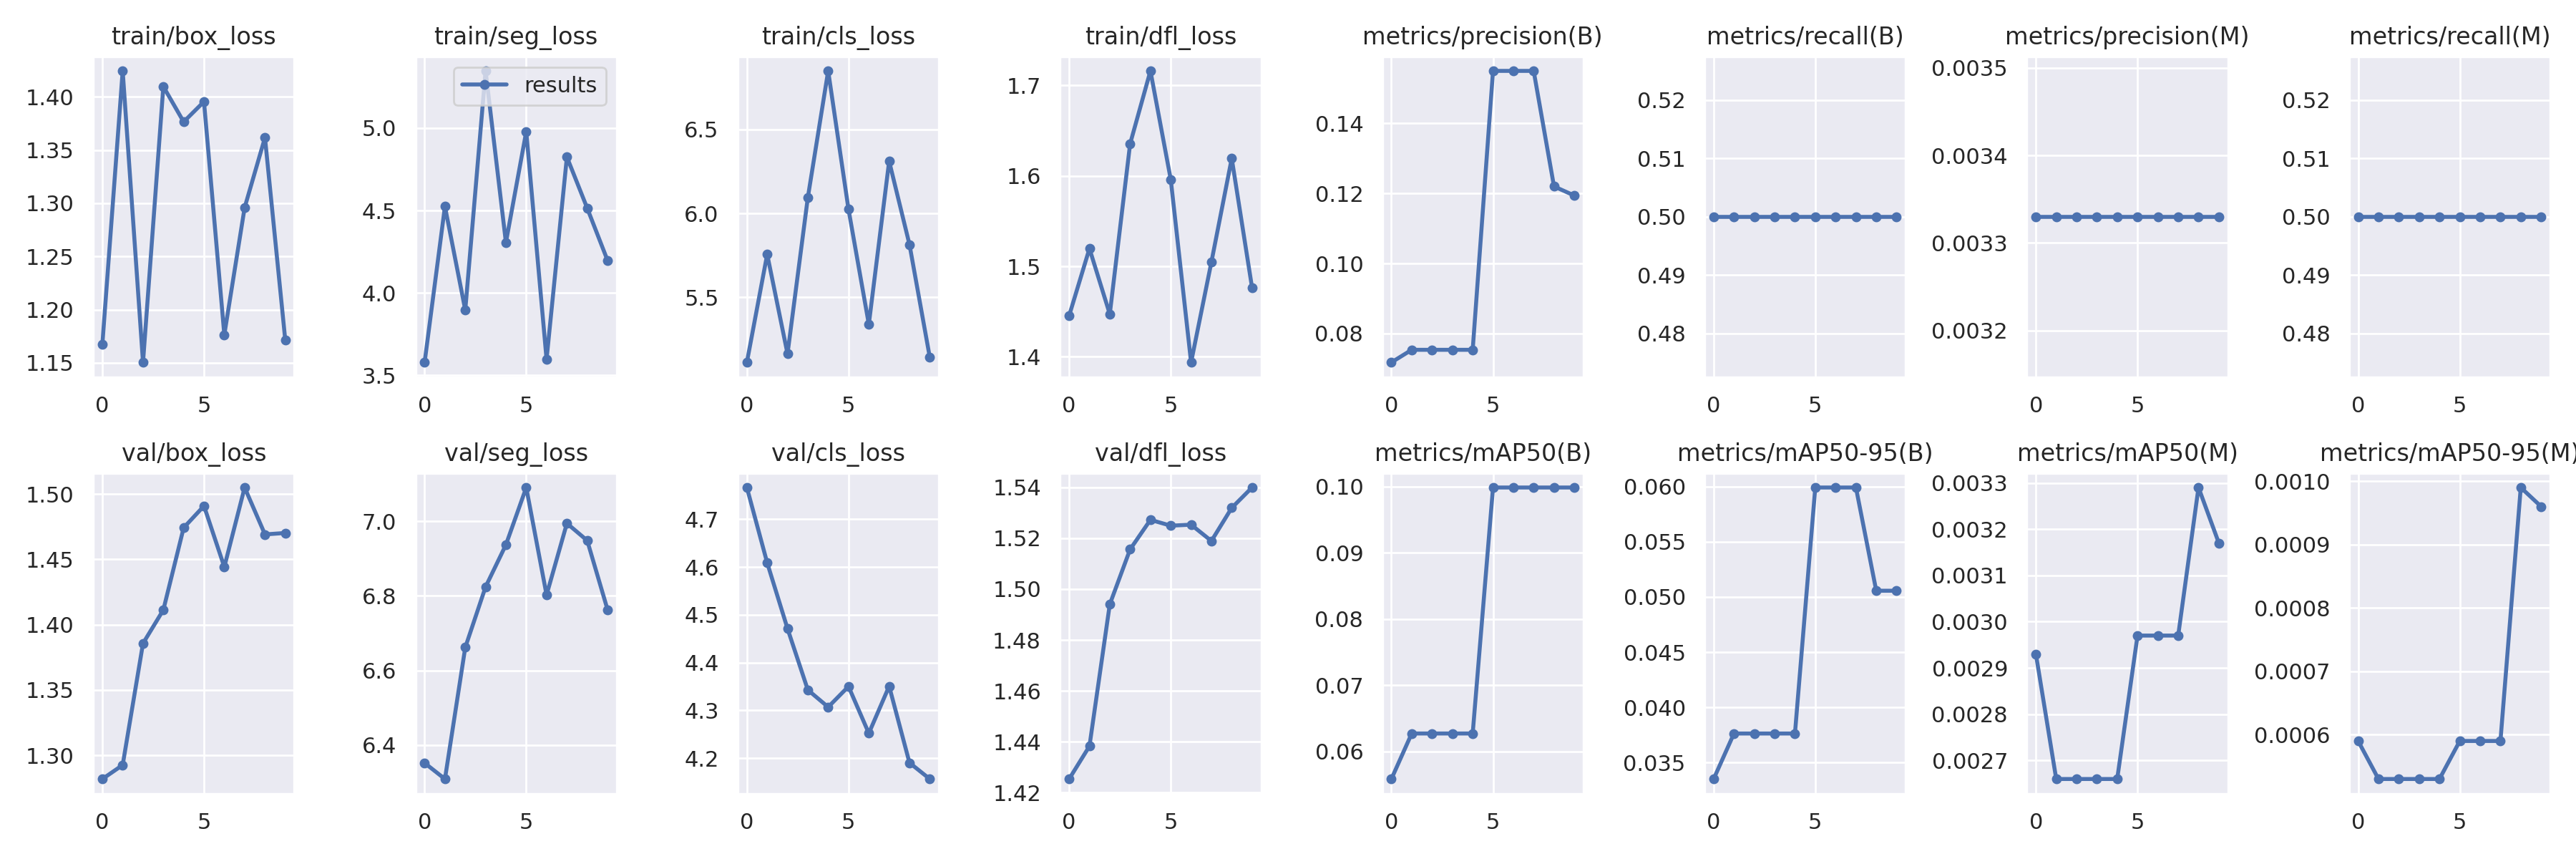

In [17]:
Image(filename=f'/content/drive/MyDrive/Yolov8-seg/runs/segment/train/results.png', width=600)

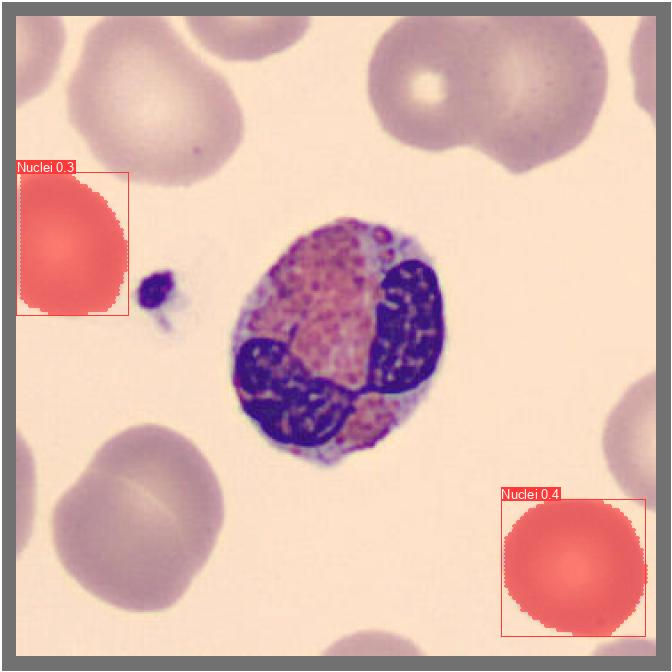

In [18]:
Image(filename=f'/content/drive/MyDrive/Yolov8-seg/runs/segment/train/val_batch0_pred.jpg', width=600)


# To improve the model, use larger dataset and more epochs!

# Validate your model

In [19]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

# Inference with our Model

In [20]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=nuclei_data/test/images save=true

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:336: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2024-1

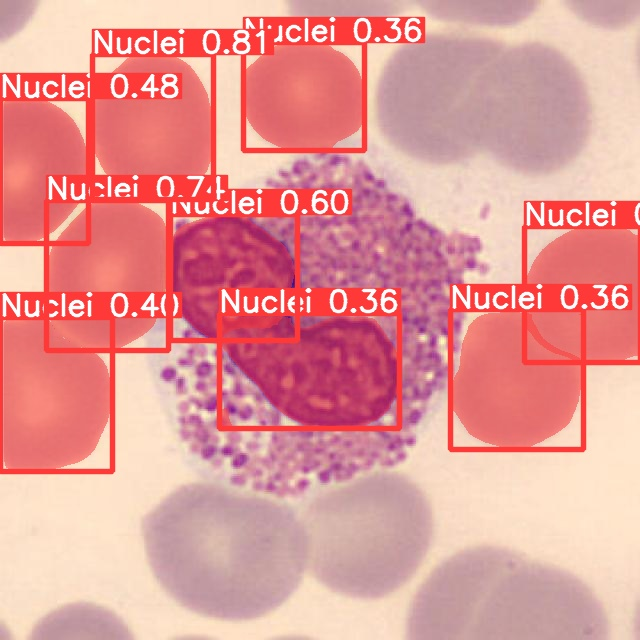

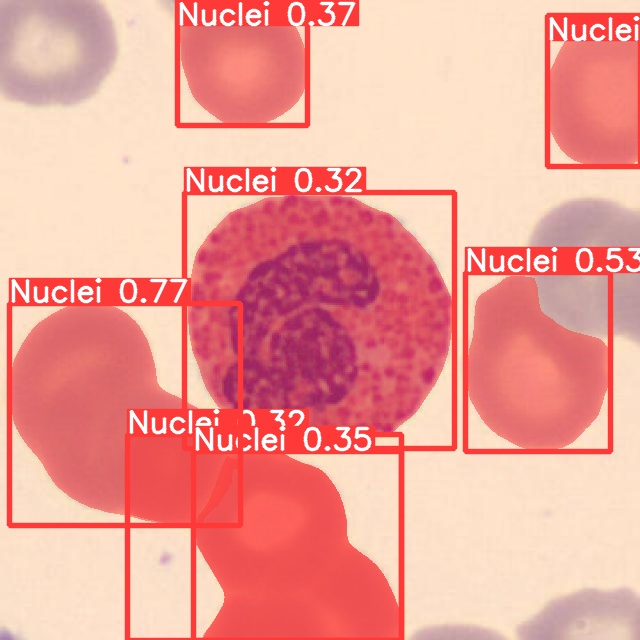

In [21]:
#Visualize your results
import glob

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
  display(Image(filename=image_path, height=600))
  print("\n")